In [1]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-10-18 12:03:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2023-10-18 12:03:56 (28.1 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
import pandas as pd
df = pd.read_csv('FuelConsumption.csv')

In [4]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = df[['CO2EMISSIONS']]

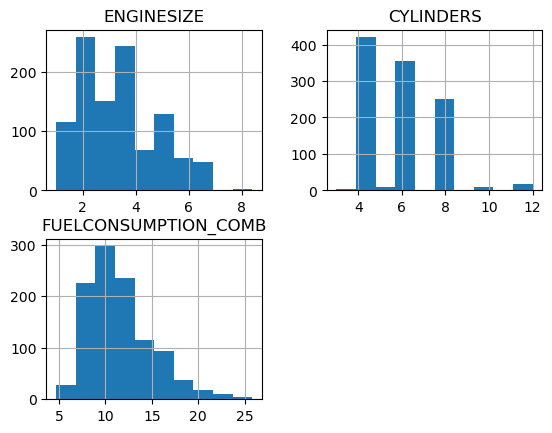

In [9]:
import matplotlib.pyplot as plt
x.hist()
plt.show()

In [15]:
features[0]

'ENGINESIZE'

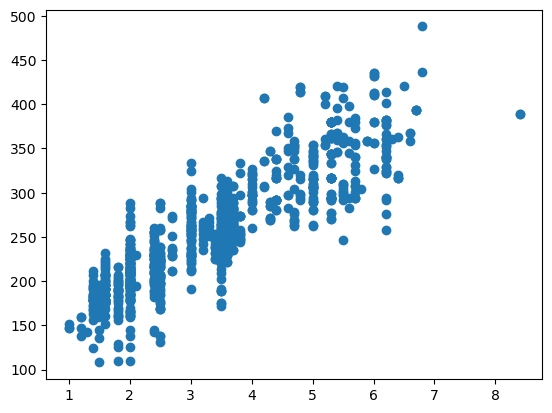

In [25]:
plt.scatter(x.ENGINESIZE, y.CO2EMISSIONS)

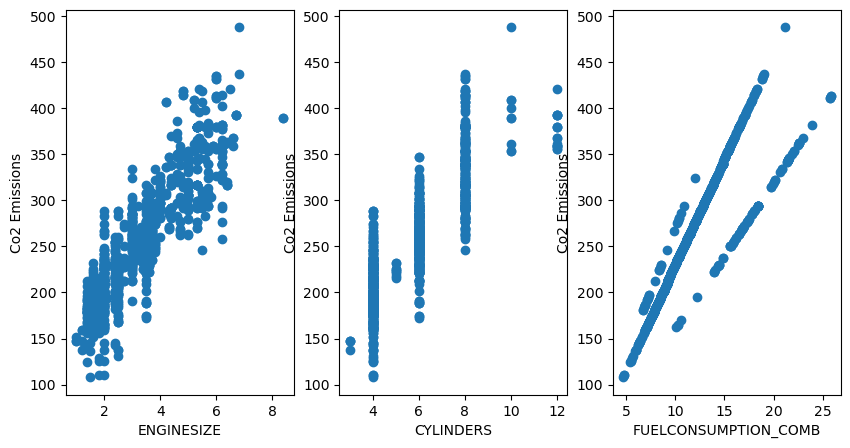

In [49]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
fig, axes = plt.subplots(1, 3, figsize = (10, 5))
for i in range(3):
    axes[i].scatter(x[features[i]],y.CO2EMISSIONS )
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel('Co2 Emissions')
plt.show()

In [29]:
#train_test_split 
import numpy as np
bool_array = np.random.rand(len(x))<0.8
train_x = x[bool_array]
train_y = y[bool_array]
test_x = x[~bool_array]
test_y = y[~bool_array]

In [35]:
train_x.shape, train_y.shape

((819, 3), (819, 1))

In [58]:
from sklearn.linear_model import LinearRegression
train_x1 = np.asanyarray(train_x[['ENGINESIZE']])
train_y1 = np.asanyarray(train_y['CO2EMISSIONS'])
regressor = LinearRegression()
regressor.fit(train_x1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
regressor.coef_

array([39.35492261])

In [64]:
regressor.intercept_

124.9194485614471

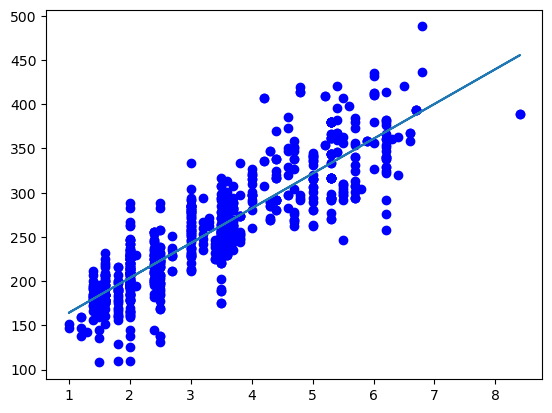

In [68]:
plt.scatter(train_x1, train_y1, color = 'blue')
plt.plot(train_x1,regressor.coef_[0]*train_x1 + regressor.intercept_)

In [70]:
test_x1 = np.asanyarray(test_x[['ENGINESIZE']])
test_y1 = np.asanyarray(test_y['CO2EMISSIONS'])

In [71]:
y_pred = regressor.predict(test_x1)

In [73]:
y_pred.shape, test_y1.shape

((248,), (248,))

In [76]:
np.concatenate((y_pred[:, np.newaxis], test_y1[:, np.newaxis]), axis = 1)[:5, :]

array([[270.53266222, 267.        ],
       [309.88758483, 354.        ],
       [309.88758483, 354.        ],
       [203.62929378, 230.        ],
       [242.98421639, 224.        ]])

In [77]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2_score : ", r2_score(test_y1, y_pred))
print("MSE : ", mean_squared_error(test_y1, y_pred))

r2_score :  0.7386733640242389
MSE :  933.3960931258231
